In [1]:
def steinmetz(freq, b_max, alpha, beta, k):
    return k*freq**alpha*b_max**beta

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from materialdatabase.material_data_base_functions import load_material_from_db, p_hyst__from_mu_r_and_mu_phi_deg, write_steinmetz_data_into_database
from materialdatabase.constants import mu_0, epsilon_0

material = load_material_from_db("N95")

Read data from the data base.


In [3]:
import pandas as pd
print(material["Manufacturer"])
measurements = material["measurements"]["complex_permeability"]["LEA_LK"]["measurement_data"]

df_measurements = pd.DataFrame()  
list_of_dfs = []
for measurement in measurements:
    # dfItem = pd.read_json(measurement)              
    dfItem = pd.DataFrame.from_records(measurement)   
    list_of_dfs.append(dfItem)  

df_measurements = pd.concat(list_of_dfs, ignore_index=True)



# print(df_measurements)

Epcos


In [4]:
# Crop the data a bit
min_flux_density = 0.01
max_flux_density = 0.25

df_measurements = df_measurements.drop(df_measurements[df_measurements.flux_density < min_flux_density].index)
df_measurements = df_measurements.drop(df_measurements[df_measurements.flux_density > max_flux_density].index)

In [5]:
temperature = 100
b_max = df_measurements.loc[(df_measurements["temperature"] == temperature)]["flux_density"].to_numpy()
freq = df_measurements.loc[(df_measurements["temperature"] == temperature)]["frequency"].to_numpy()
mu_r_abs = df_measurements.loc[(df_measurements["temperature"] == temperature)]["mu_r_abs"].to_numpy()
mu_phi_deg = df_measurements.loc[(df_measurements["temperature"] == temperature)]["mu_phi_deg"].to_numpy()


import numpy as np
ploss = p_hyst__from_mu_r_and_mu_phi_deg(freq, b_max, mu_r_abs, mu_phi_deg)

# print(b_max)
# print(freq)
# print(ploss)

In [6]:
# estimated_loss = np.array(len(freq))
def estimated_loss(alpha, beta, k):
    return steinmetz(freq, b_max, alpha, beta, k)

def normalized_error(alpha, beta, k):
    return np.mean(np.abs((estimated_loss(alpha, beta, k)-ploss)/ploss))
    # return np.mean(np.divide(np.absestimated_loss(alpha, beta, k) - ploss)), ploss, out=np.zeros_like(ploss), where=ploss!=0)))

In [12]:
import optuna

def objective(trial):
    aa = trial.suggest_float('aa', 1, 2)
    bb = trial.suggest_float('bb', 2.5, 4)
    kk = trial.suggest_float('kk', 0.1, 100)
    return normalized_error(aa, bb, kk)

study = optuna.create_study()
study.optimize(objective, n_trials=1000)

study.best_params

[I 2023-06-14 13:43:34,559] A new study created in memory with name: no-name-95166dd6-a1b8-4945-bb51-33222dd39d12
[I 2023-06-14 13:43:34,562] Trial 0 finished with value: 0.9752531233893352 and parameters: {'aa': 1.0823977345989628, 'bb': 3.8830042376664404, 'kk': 96.87601744395947}. Best is trial 0 with value: 0.9752531233893352.
[I 2023-06-14 13:43:34,565] Trial 1 finished with value: 1.6821052083641808 and parameters: {'aa': 1.3790449355101564, 'bb': 2.6962700883459005, 'kk': 23.67825739862505}. Best is trial 0 with value: 0.9752531233893352.
[I 2023-06-14 13:43:34,567] Trial 2 finished with value: 0.8774493589528586 and parameters: {'aa': 1.0989435736640873, 'bb': 2.914572922917926, 'kk': 55.08608869225155}. Best is trial 2 with value: 0.8774493589528586.
[I 2023-06-14 13:43:34,570] Trial 3 finished with value: 9.208292987005887 and parameters: {'aa': 1.464715856751858, 'bb': 2.6838252911809386, 'kk': 30.346060618466716}. Best is trial 2 with value: 0.8774493589528586.
[I 2023-06-1

{'aa': 1.4123508918779477, 'bb': 2.7453539657852377, 'kk': 6.249065188505049}

In [17]:
study.optimize(objective, n_trials=1000)

study.best_params

[I 2023-06-14 13:46:31,826] Trial 1000 finished with value: 0.22597574569440076 and parameters: {'aa': 1.3711358650544663, 'bb': 2.7062194779534914, 'kk': 11.257645288333256}. Best is trial 349 with value: 0.1509828134737223.
[I 2023-06-14 13:46:31,861] Trial 1001 finished with value: 0.479682523510159 and parameters: {'aa': 1.2884294598661894, 'bb': 3.6243329748765754, 'kk': 98.64794493960363}. Best is trial 349 with value: 0.1509828134737223.
[I 2023-06-14 13:46:31,899] Trial 1002 finished with value: 8.429385414745248 and parameters: {'aa': 1.3873552428401195, 'bb': 2.745814132580996, 'kk': 83.86517428385554}. Best is trial 349 with value: 0.1509828134737223.
[I 2023-06-14 13:46:31,938] Trial 1003 finished with value: 1580.945471747248 and parameters: {'aa': 1.8956513170351748, 'bb': 2.667064004277424, 'kk': 21.06642624200618}. Best is trial 349 with value: 0.1509828134737223.
[I 2023-06-14 13:46:31,977] Trial 1004 finished with value: 0.8029187970543409 and parameters: {'aa': 1.315

{'aa': 1.5046634099551928, 'bb': 2.621708609111632, 'kk': 1.5754202183943917}

In [23]:
study.optimize(objective, n_trials=1000)

study.best_params

[I 2023-06-14 13:49:31,227] Trial 2000 finished with value: 0.8503760941206215 and parameters: {'aa': 1.2215262703200782, 'bb': 3.59693060622427, 'kk': 60.650913626510345}. Best is trial 1537 with value: 0.11201315520648145.
[I 2023-06-14 13:49:31,318] Trial 2001 finished with value: 7.189348440265228 and parameters: {'aa': 1.4479862838794277, 'bb': 3.193179379885918, 'kk': 89.46048964375387}. Best is trial 1537 with value: 0.11201315520648145.
[I 2023-06-14 13:49:31,432] Trial 2002 finished with value: 0.6178538144803715 and parameters: {'aa': 1.3934994428993637, 'bb': 2.5465642945948117, 'kk': 8.502032738138954}. Best is trial 1537 with value: 0.11201315520648145.
[I 2023-06-14 13:49:31,542] Trial 2003 finished with value: 0.7196123682866914 and parameters: {'aa': 1.4299887519479462, 'bb': 3.2879171391824835, 'kk': 4.651307671717805}. Best is trial 1537 with value: 0.11201315520648145.
[I 2023-06-14 13:49:31,629] Trial 2004 finished with value: 13.507957854666795 and parameters: {'aa

{'aa': 1.6940209914412754, 'bb': 2.6126025489145945, 'kk': 0.1495727926432091}

In [24]:
print(study.best_params)

{'aa': 1.6940209914412754, 'bb': 2.6126025489145945, 'kk': 0.1495727926432091}


In [22]:
# fig = optuna.visualization.plot_optimization_history(study)
# fig = optuna.visualization.plot_contour(study, params=["aa", "bb", "kk"])
# fig.show()

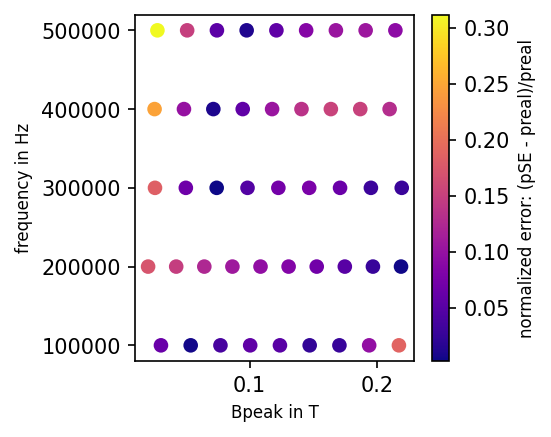

In [25]:
import matplotlib.pyplot as plt
import matplotlib

fontsize = 8
error_norm = (estimated_loss(study.best_params["aa"],study.best_params["bb"],study.best_params["kk"]) - ploss) / ploss
# error_norm = np.divide(estimated_loss(study.best_params["aa"],study.best_params["bb"],study.best_params["kk"]) - ploss, ploss, out=np.zeros_like(ploss), where=ploss!=0)


# 1D error plots
#plt.scatter(b_max, error_norm)
#plt.scatter(freq, error_norm)

# 2D error plots
plt.figure(dpi=150, figsize=(3,3))
cm = matplotlib.colormaps['plasma']
xy = range(20)
sc = plt.scatter(b_max, freq, c=abs(error_norm), vmin=None, vmax=None, s=None, cmap=cm)
cbar = plt.colorbar(sc)
cbar.set_label('normalized error: (pSE - preal)/preal', fontsize=fontsize)
plt.xlabel("Bpeak in T", fontsize=fontsize)
plt.ylabel("frequency in Hz", fontsize=fontsize)

plt.show()

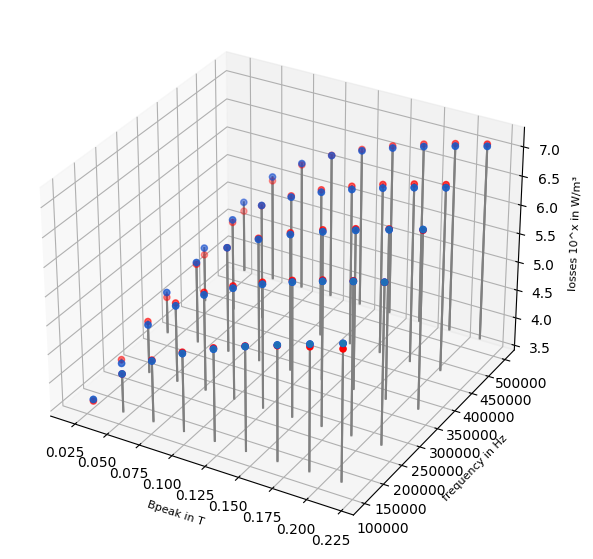

In [26]:
p_estimated = estimated_loss(study.best_params["aa"],study.best_params["bb"],study.best_params["kk"])

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')

log_plot = True
z_label = "losses 10^x in W/m³" if log_plot else "losses in W/m³"

# Estimation plot
p1 = np.log10(p_estimated) if log_plot else p_estimated
sc = ax.scatter(b_max, freq, p1, color='red')
z1=np.ones(shape=b_max.shape)*min(p1)
# lines
for i,j,k,h in zip(b_max, freq, p1, z1):
    ax.plot([i,i],[j,j],[k,h], color='grey')

# Measurement plot
p2 = np.log10(ploss) if log_plot else ploss
sc = ax.scatter(b_max, freq, p2, color='blue')
z2=np.ones(shape=b_max.shape)*min(p2)
# lines
for i,j,k,h in zip(b_max, freq, p2, z2):
    ax.plot([i,i],[j,j],[k,h], color='grey')

sc = ax.scatter(b_max, freq, np.log10(ploss))
ax.set_zlabel(z_label, fontsize=fontsize, rotation = 0)

# sc = ax.scatter(b_max, freq, p_estimated)
# sc = ax.scatter(b_max, freq, ploss)
# plt.ylabel("frequency in Hz", fontsize=fontsize)
plt.xlabel("Bpeak in T", fontsize=fontsize)
plt.ylabel("frequency in Hz", fontsize=fontsize)

plt.show()